# Plots for paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from plotting import plot_custom_corner

In [4]:
def plot_all_corners(path,seed,save_id):


    #default values of GW parameters
    ranges=[(4e-7,6e-7),(-np.pi,np.pi),(0.0+1.0,np.pi+1.0),(0.0,np.pi/2.0),(-np.pi/2 + 0.8,np.pi/2 + 0.8),(0.0,np.pi),(0.5e-12,1.5e-12)]
    injection_parameters = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
    labels = [r'$\omega$',r'$\Phi_0$',r'$\psi$',r'$\iota$', r'$\delta$',r'$\alpha$',r'h']
    variables_to_plot = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
    axes_scales = None

    #Corner plot of GW parameters
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_GW')




    #Plot f0 
    pulsars = pd.read_csv("../data/NANOGrav_pulsars.csv")
    true_f = pulsars["F0"].to_numpy()


    labels = [r'$f_0$',r'$f_1$',r'$f_2$',r'$f_3$', r'$f_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["f00", "f01", "f02", "f03", "f04"]

#    ranges = [(i*0.9,i*1.1) for i in injection_parameters]


    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]


    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_f' )


    #Plot f1
    true_f = pulsars["F1"].to_numpy()

    labels = [r'$\dot{f}_0$',r'$\dot{f}_1$',r'$\dot{f}_2$',r'$\dot{f}_3$', r'$\dot{f}_4$']
    idx = len(labels)
    injection_parameters = true_f[0:idx]
    variables_to_plot = ["fdot0", "fdot1", "fdot2", "fdot3", "fdot4"]

    tol = 0.1
    ranges = [(i-np.abs(i*tol),i+np.abs(i*tol)) for i in injection_parameters]
    axes_scales = None
    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_fdot')


    #Plot sigma_p, log scaled
    generator = np.random.default_rng(seed)
    σp = generator.uniform(low = 1e-21,high=1e-19,size=len(true_f))

        
    labels = [r'$\sigma_p^0$',r'$\sigma_p^1$',r'$\sigma_p^2$',r'$\sigma_p^3$', r'$\sigma_p^4$']
    idx = len(labels)
    injection_parameters = σp[0:idx]
    variables_to_plot    = ["sigma_p0", "sigma_p1", "sigma_p2", "sigma_p3", "sigma_p4"]
    ranges = [(1e-22,1e-18) for i in injection_parameters]




    plot_custom_corner(path,variables_to_plot,labels,injection_parameters,ranges,axes_scales,savefig=f'{save_id}_sigma_p',logscale=True)




## Example 1: Run ID 1237, $h = 10^{-12}$

The evidence is: 307367.5947302282
Number of samples:
5760
Truths/Medians/Variances
$\omega$ 5e-07 5.536837557663781e-09 1.605797649602817e-20
$\Phi_0$ 0.2 0.03082651509757893 7.290680749353825e-05
$\psi$ 2.5 0.7066853998547871 1.383997326913123e-06
$\iota$ 1.0 0.7494959675301247 0.01598786650668303
$\delta$ 1.0 1.017833707629137 4.591448961238288e-07
$\alpha$ 1.0 2.648521512456918 2.2402578131458192e-07
h 1e-12 7.33702543707599e-13 4.077332779816983e-27
Exception - likely because corner.corner cannot find nice contours since NS did not coverge well
There is probably a large difference in the medians and the truth values
Skipping plotting
**********************************************************************
The evidence is: 307367.5947302282
Number of samples:
5760
Truths/Medians/Variances
$f_0$ 327.8470205611185 325.38125578755876 0.32571048169959727
$f_1$ 205.53069910059 205.64277249653819 0.826886260769313
$f_2$ 303.0909794113198 300.5815836297511 0.13612536977849807
$f_3$ 326.6005

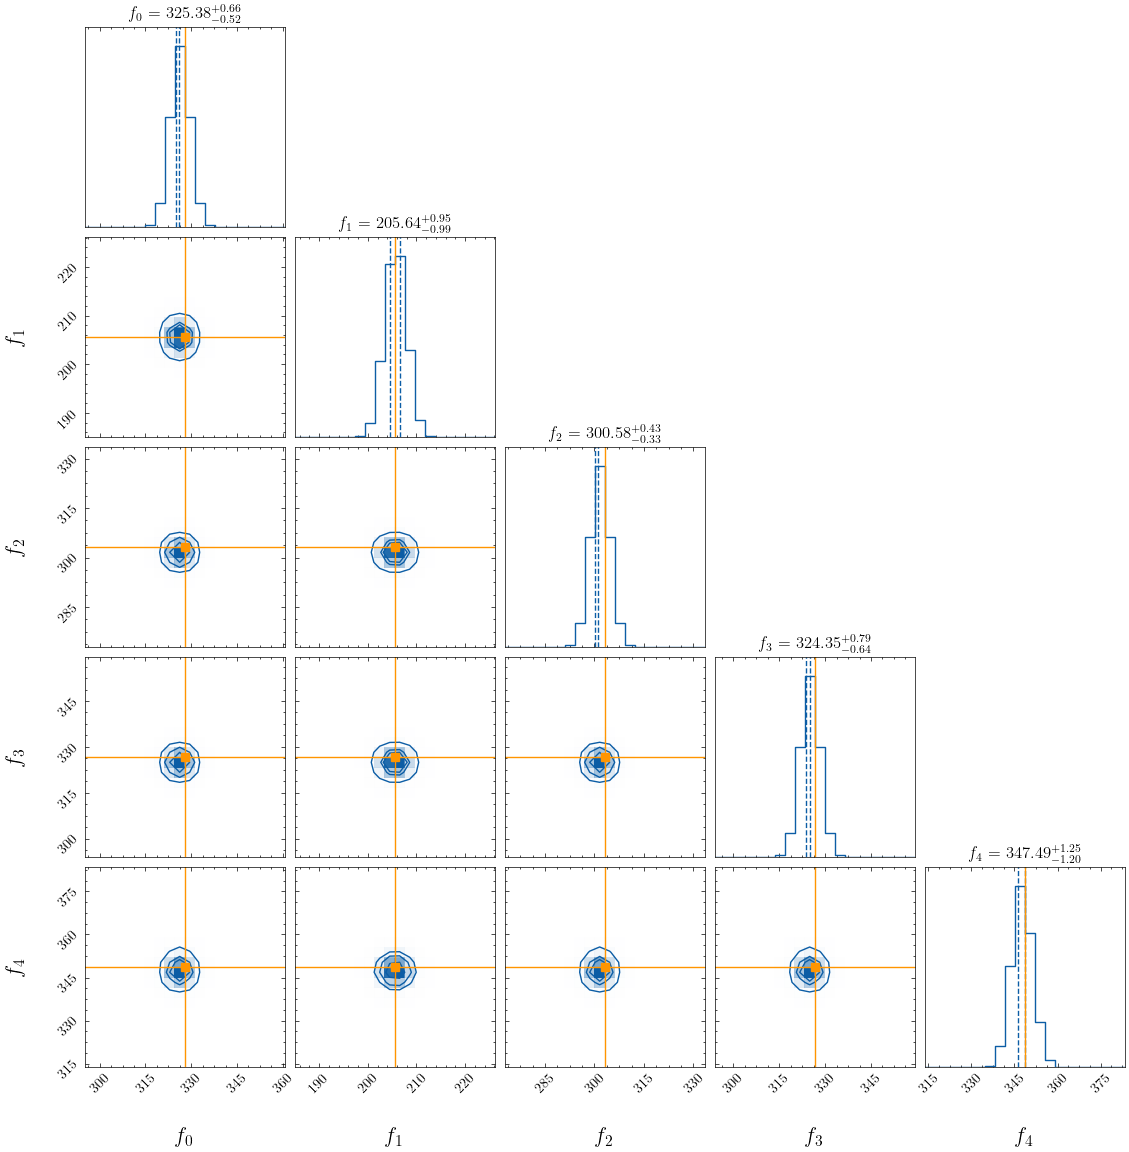

**********************************************************************
The evidence is: 307367.5947302282
Number of samples:
5760
Truths/Medians/Variances
$\dot{f}_0$ -1.227834e-15 -1.230679301473943e-15 2.437069858159607e-35
$\dot{f}_1$ -4.297e-16 -4.288542105956099e-16 3.5699751158446616e-36
$\dot{f}_2$ -6.4737e-16 -6.510895932818847e-16 3.67037737462966e-36
$\dot{f}_3$ -1.022991e-15 -1.0243275046319468e-15 1.727285556417285e-35
$\dot{f}_4$ -4.1895e-16 -4.2020268773740026e-16 2.3501489043254587e-36


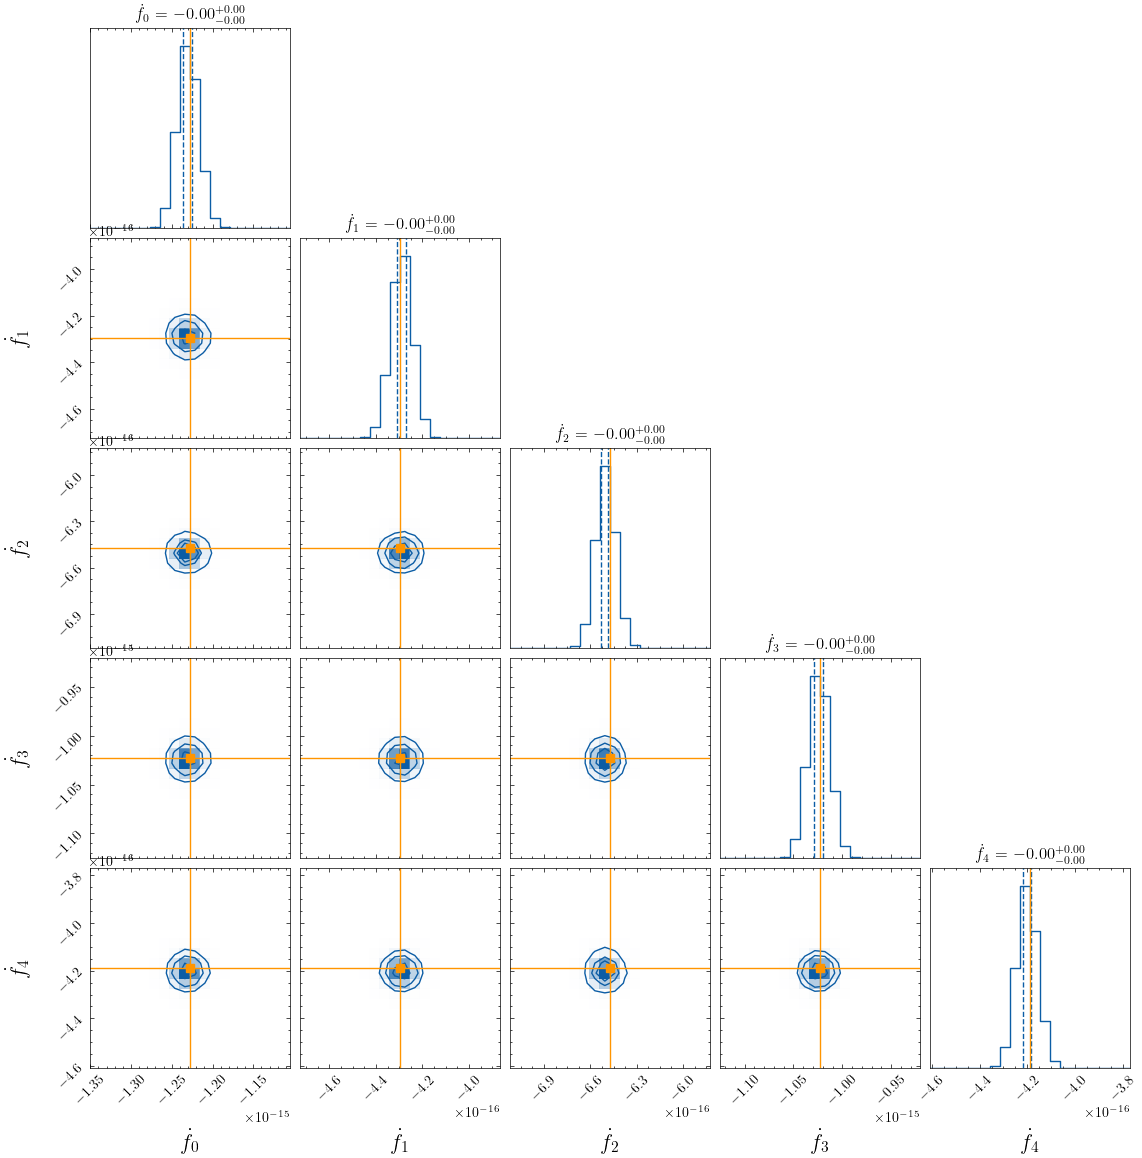

**********************************************************************
The evidence is: 307367.5947302282
Number of samples:
5760
Truths/Medians/Variances
$\sigma_p^0$ 9.769327690311607e-20 4.891526707310805e-21 8.198487410998813e-41
$\sigma_p^1$ 3.8639377766942156e-20 3.0028291684092177e-21 9.902570497090748e-42
$\sigma_p^2$ 9.240137714263159e-20 1.3204127048245794e-20 3.8013509251462055e-40
$\sigma_p^3$ 2.6907549962490873e-20 5.299200593198727e-21 1.3694095133953358e-40
$\sigma_p^4$ 3.2590608783005556e-20 6.842135748931425e-21 1.9142739696123155e-40


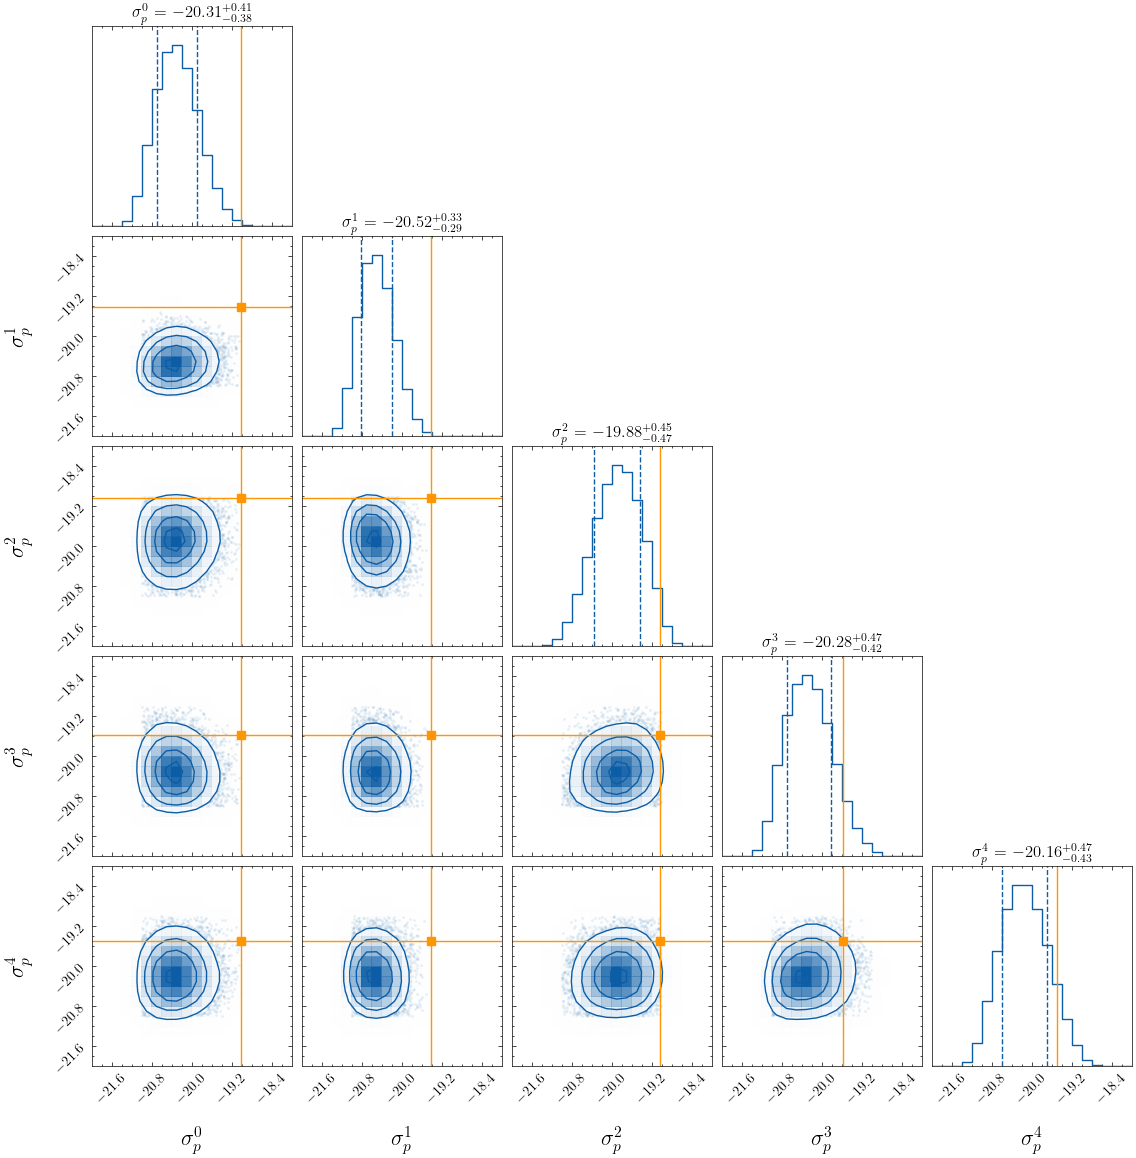

**********************************************************************


In [6]:
import numpy as np 
path = "../data/nested_sampling/long_wavelength_experiment_1_result.json"
plot_all_corners(path,1234,save_id='long_wavelegnth_expt_1')